In [3]:
# Load the Pacakages 

import pyodbc     
from dotenv import dotenv_values    #import the dotenv_values function from the dotenv package
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

# Step 1: Data Exploration and Understanding

Load your dataset into a Pandas DataFrame.

In [4]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server_name")
database = environment_variables.get("database_name")
username = environment_variables.get("username")
password = environment_variables.get("password")

In [5]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinP"

In [6]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server 


connection = pyodbc.connect(connection_string)

In [7]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

query = "SELECT * FROM LP2_Telco_churn_first_3000"

First_Churn = pd.read_sql(query, connection)

In [8]:
First_Churn.head(50)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
5,9305-CDSKC,Female,False,False,False,8,True,True,Fiber optic,False,...,True,False,True,True,Month-to-month,True,Electronic check,99.650002,820.500000,True
6,1452-KIOVK,Male,False,False,True,22,True,True,Fiber optic,False,...,False,False,True,False,Month-to-month,True,Credit card (automatic),89.099998,1949.400024,False
7,6713-OKOMC,Female,False,False,False,10,False,None,DSL,True,...,False,False,False,False,Month-to-month,False,Mailed check,29.750000,301.899994,False
8,7892-POOKP,Female,False,True,False,28,True,True,Fiber optic,False,...,True,True,True,True,Month-to-month,True,Electronic check,104.800003,3046.050049,True
9,6388-TABGU,Male,False,False,True,62,True,False,DSL,True,...,False,False,False,False,One year,False,Bank transfer (automatic),56.150002,3487.949951,False


In [9]:
First_Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


Data Cleaning:

Handle missing values, outliers, and any inconsistencies in the data.

In [10]:
# Check for missing values in each column
print(First_Churn.isnull().sum())

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64


In [11]:
# Handle missing values in categorical columns
categorical_columns = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'Churn']
for column in categorical_columns:
    First_Churn[column] = First_Churn[column].fillna('Missing')

In [12]:
for column in First_Churn:
    print(column, First_Churn[column].nunique())

customerID 3000
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 73
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1198
TotalCharges 2893
Churn 3


Data Exploration:

Use descriptive statistics and visualizations to understand the distribution of variables, identify outliers, and get a sense of the data.

<Axes: >

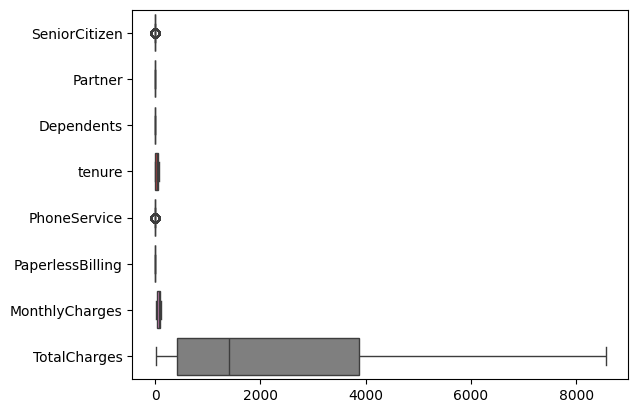

In [28]:
sns.boxplot(data=First_Churn, orient='h')

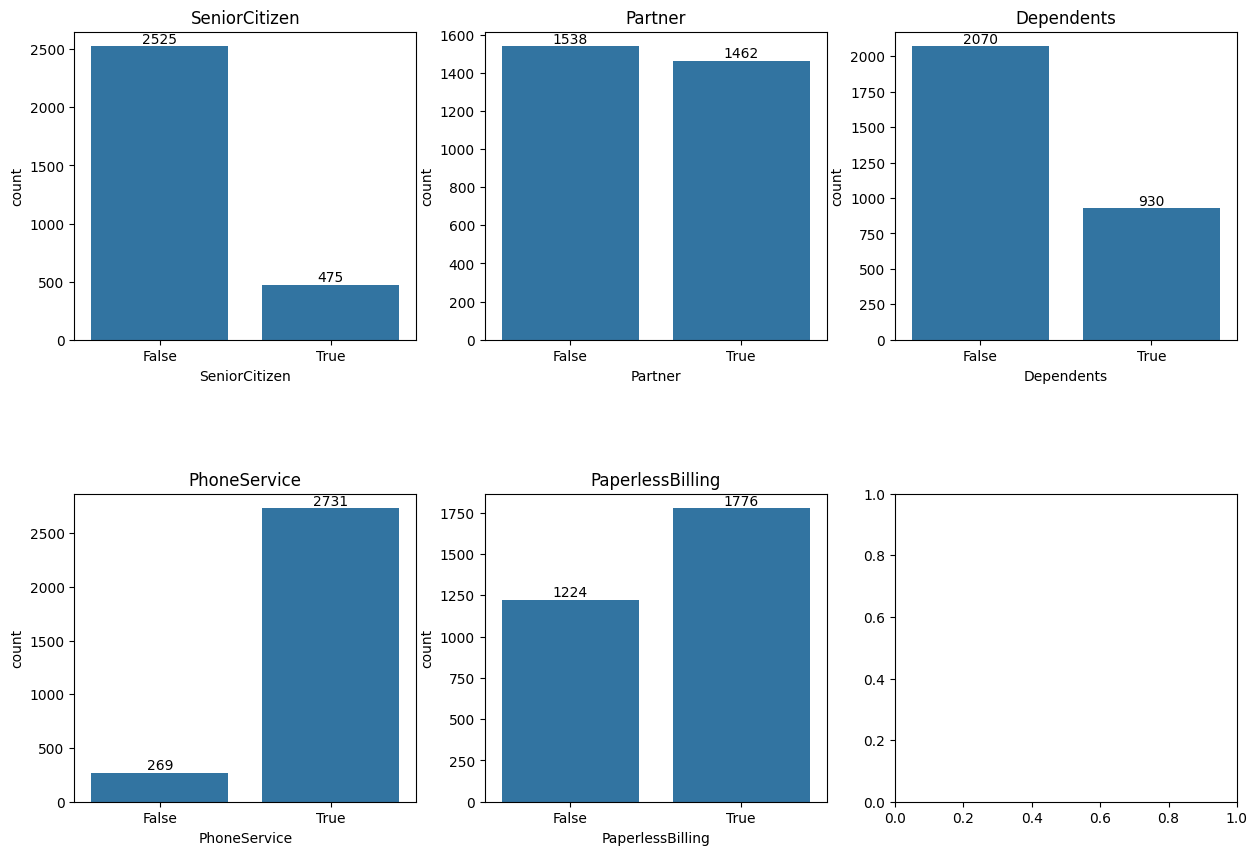

In [14]:

# List of columns containing boolean (binary) values
boolean_columns = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Set up subplots for better visibility
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

# Flatten the 2D axes array to make it easier to iterate
axes = axes.flatten()

# Loop through each boolean column
for i, column in enumerate(boolean_columns):
    # Create a count plot using Seaborn
    sns.countplot(data=First_Churn, x=column, ax=axes[i])

    # Add count annotations to each bar using ax.text
    for p in axes[i].patches:
        axes[i].text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())),
                     ha='center', va='bottom', fontsize=10)

    # Add a title to the count plot with the name of the column
    axes[i].set_title(column)

# Show the count plots
plt.show()


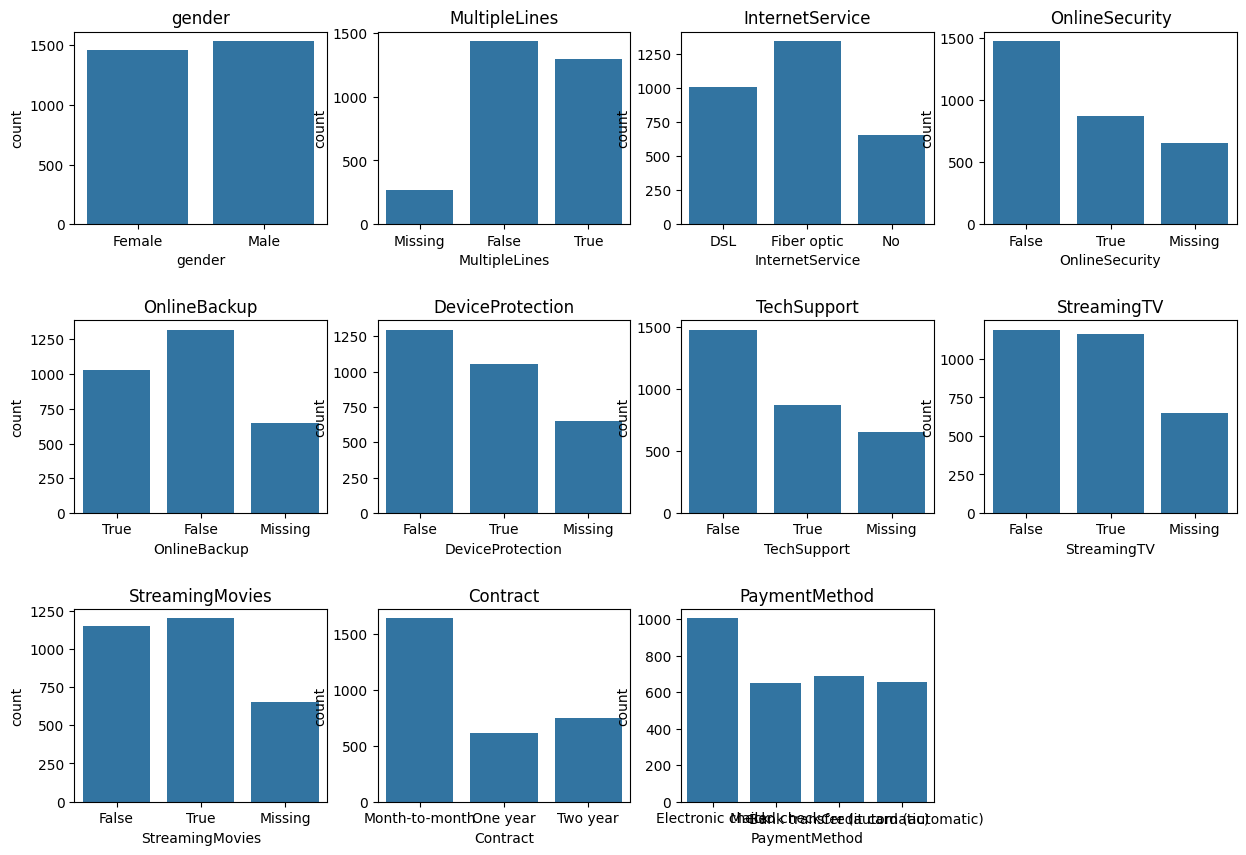

In [15]:


# List of columns containing categorical values
categorical_columns = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Set up subplots for better visibility
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

# Flatten the 2D axes array to make it easier to iterate
axes = axes.flatten()

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    # Create a count plot using Seaborn
    sns.countplot(data=First_Churn, x=column, ax=axes[i])

    # Add a title to the count plot with the name of the column
    axes[i].set_title(column)

# Hide empty subplots
for i in range(len(categorical_columns), len(axes)):
    axes[i].axis('off')

# Show the count plots
plt.show()


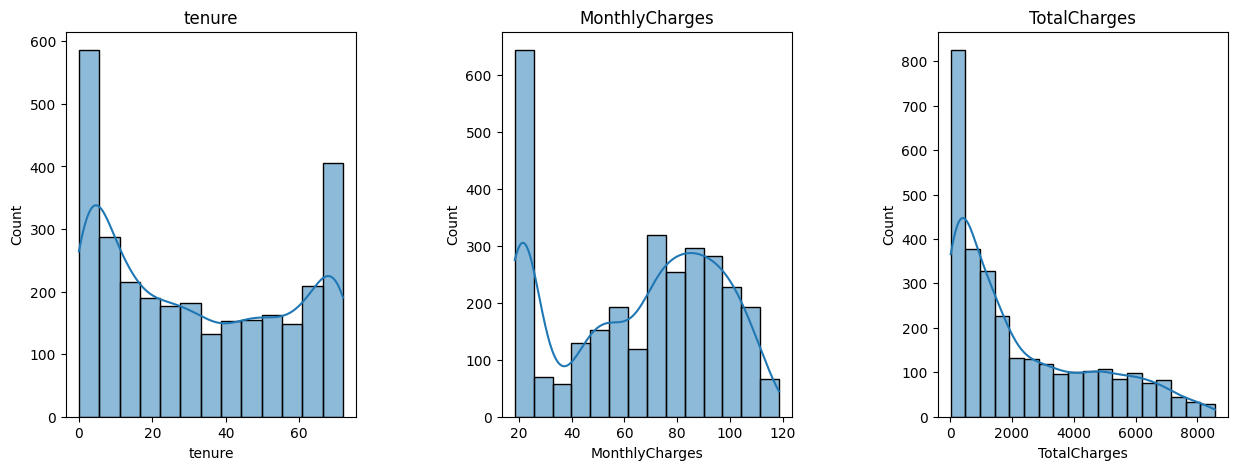

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Set up subplots for better visibility
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 5))
fig.subplots_adjust(wspace=0.5)  # Adjust horizontal spacing

# Loop through each numerical column
for i, column in enumerate(numerical_columns):
    # Create a histogram using Seaborn
    sns.histplot(data=First_Churn, x=column, kde=True, ax=axes[i])

    # Add a title to the histogram with the name of the column
    axes[i].set_title(column)

# Show the subplots for numerical histograms
plt.show()


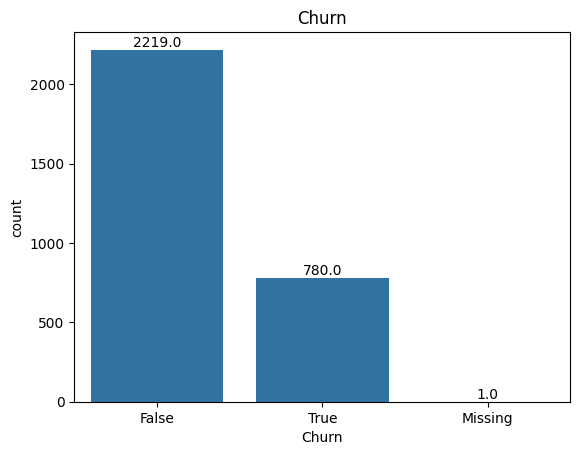

In [22]:

# Create a count plot for the 'Churn' column
sns.countplot(data=First_Churn, x='Churn')

# Add count annotations to each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=10)

# Add a title to the count plot
plt.title('Churn')

# Show the count plot
plt.show()


                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000         0.23024      0.824273
MonthlyCharges  0.230240         1.00000      0.641280
TotalCharges    0.824273         0.64128      1.000000


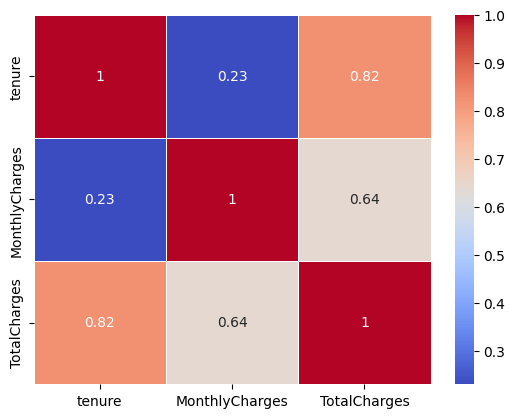

In [23]:
numeric_columns = First_Churn.select_dtypes(include=['number']).columns
correlation_matrix = First_Churn[numeric_columns].corr()

# Display the correlation matrix
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

Feature Engineering:

Consider creating new features or modifying existing ones based on domain knowledge or insights gained during exploratory data analysis



In [29]:
# Combine Partner and Dependents to create a new feature representing the size of the customer'

First_Churn['FamilySize'] = First_Churn['Partner'].astype(int) + First_Churn['Dependents'].astype(int)


In [30]:
# Create a binary feature indicating whether the customer has both phone service and internet service.

First_Churn['HasPhoneAndInternet'] = (First_Churn['PhoneService'] & (First_Churn['InternetService'] != 'No')).astype(int)


In [31]:
# Create a binary feature indicating whether the customer subscribes to any streaming service.

First_Churn['StreamingServices'] = First_Churn[['StreamingTV', 'StreamingMovies']].any(axis=1).astype(int)


In [33]:
# Create a new feature indicating the average total charges per tenure.

First_Churn['TotalChargesPerTenure'] = First_Churn['TotalCharges'] / First_Churn['tenure'].replace(0, 1)


Split the Dataset:

Split the dataset into training and testing sets. The training set is used to train the model, and the testing set is used to evaluate its performance on unseen data.

In [25]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = First_Churn.drop('Churn', axis=1)  # Assuming 'Churn' is the target variable
y = First_Churn['Churn']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (2400, 20)
Shape of X_test: (600, 20)
Shape of y_train: (2400,)
Shape of y_test: (600,)
